In [3]:
import os

import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model, preprocessing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings("ignore")






In [4]:
pwd

'C:\\Users\\User'

In [5]:
#Load the 
train_input= pd.read_csv(r"C:\\Users\\User\\Desktop\\Credit_Risk_Train_data.csv")
test_input=pd.read_csv("C:\\Users\\User\\Desktop\\Credit_Risk_Train_data.csv")

In [6]:
#Display the data

In [7]:
print(train_input.shape)
print(test_input.shape)

(614, 13)
(614, 13)


In [8]:
test_input.rename(columns={"outcome" : "Loan_Status"}, inplace=True)

In [9]:
all=pd.concat([train_input, test_input], axis=0)
all.shape


(1228, 13)

In [10]:

all.reset_index(inplace=True, drop=True) #reset index to avoid merging issues
all.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1223,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
1224,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
1225,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
1226,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
1227,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [11]:
all.isnull().sum()

Loan_ID                0
Gender                26
Married                6
Dependents            30
Education              0
Self_Employed         64
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            44
Loan_Amount_Term      28
Credit_History       100
Property_Area          0
Loan_Status            0
dtype: int64

In [12]:
Counter(all['Gender'])

Counter({'Male': 978, 'Female': 224, nan: 26})

In [13]:
#Filling all empty columns with 'Male'
print(all[all['Gender'].isnull()].index.tolist()) #empty now filled with Male
gender_null=all[all['Gender'].isnull()].index.tolist()


[23, 126, 171, 188, 314, 334, 460, 467, 477, 507, 576, 588, 592, 637, 740, 785, 802, 928, 948, 1074, 1081, 1091, 1121, 1190, 1202, 1206]


In [14]:
all['Gender'].iloc[gender_null] ="Male"

In [15]:
#check if filled 
print(sum(all['Gender'].isnull()))
Counter(all['Gender'])

0


Counter({'Male': 1004, 'Female': 224})

In [16]:
#Filling 'Married' now
print(Counter(all['Married']))
pd.crosstab(all['Married'].isnull(), all['Dependents'].isnull())
#For all 3 missing values in Married, the # of dependents are the same. 
#So fill them with married 


Counter({'Yes': 796, 'No': 426, nan: 6})


Dependents,False,True
Married,,
False,1198,24
True,0,6


In [17]:
married_null = all[all['Married'].isnull()].index.tolist()
married_null

[104, 228, 435, 718, 842, 1049]

In [18]:
all['Married'].iloc[married_null]='Yes'

In [19]:
all.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents            30
Education              0
Self_Employed         64
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            44
Loan_Amount_Term      28
Credit_History       100
Property_Area          0
Loan_Status            0
dtype: int64

In [20]:
Counter(all['Dependents'])

Counter({'0': 690, '1': 204, '2': 202, '3+': 102, nan: 30})

In [21]:
bachelor_nulldependent= all[(all['Married']=="No") & (all['Dependents'].isnull())]
print(bachelor_nulldependent)


       Loan_ID  Gender Married Dependents Education Self_Employed  \
293   LP001945  Female      No        NaN  Graduate            No   
332   LP002100    Male      No        NaN  Graduate            No   
355   LP002144  Female      No        NaN  Graduate            No   
597   LP002943    Male      No        NaN  Graduate            No   
907   LP001945  Female      No        NaN  Graduate            No   
946   LP002100    Male      No        NaN  Graduate            No   
969   LP002144  Female      No        NaN  Graduate            No   
1211  LP002943    Male      No        NaN  Graduate            No   

      ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
293              5417                0.0       143.0             480.0   
332              2833                0.0        71.0             360.0   
355              3813                0.0       116.0             180.0   
597              2987                0.0        88.0             360.0   
907     

In [22]:
Counter(all['Dependents'])

Counter({'0': 690, '1': 204, '2': 202, '3+': 102, nan: 30})

In [23]:
#lest see how many dependents male and Female Have
pd.crosstab(all['Gender'], all['Dependents'])

Dependents,0,1,2,3+
Gender,,,,
Female,160,38,14,6
Male,530,166,188,96


In [24]:
#Lets see the gender of the missing dependents
all['Gender'].iloc[all[all['Dependents'].isnull()].index.tolist()]

102       Male
104       Male
120       Male
226       Male
228       Male
293     Female
301       Male
332       Male
335       Male
346       Male
355     Female
435     Female
517       Male
571       Male
597       Male
716       Male
718       Male
734       Male
840       Male
842       Male
907     Female
915       Male
946       Male
949       Male
960       Male
969     Female
1049    Female
1131      Male
1185      Male
1211      Male
Name: Gender, dtype: object

In [25]:
#Filling all # dependents with 0
all['Dependents'].iloc[all[all['Dependents'].isnull()].index.tolist()]='0'

In [26]:
all.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed         64
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            44
Loan_Amount_Term      28
Credit_History       100
Property_Area          0
Loan_Status            0
dtype: int64

In [27]:
Counter(all['Self_Employed'])

Counter({'No': 1000, 'Yes': 164, nan: 64})

In [28]:
self_emp_null=all[all['Self_Employed'].isnull()].index.tolist()

In [29]:
#filing all missing selfemployed with NO
all['Self_Employed'].iloc[self_emp_null]='No'

In [30]:
all.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            44
Loan_Amount_Term      28
Credit_History       100
Property_Area          0
Loan_Status            0
dtype: int64

In [31]:
pd.crosstab(all['LoanAmount'].isnull(),all['Loan_Amount_Term'])

Loan_Amount_Term,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,360.0,480.0
LoanAmount,,,,,,,,,,
False,2,4,4,8,6,84,6,26,986,30
True,0,0,0,0,0,4,2,0,38,0


In [32]:
all.groupby(all['Loan_Amount_Term'])['LoanAmount'].mean()

Loan_Amount_Term
12.0     111.000000
36.0     117.500000
60.0     140.000000
84.0     132.250000
120.0     22.333333
180.0    147.523810
240.0    118.333333
300.0    185.153846
360.0    147.245436
480.0    151.800000
Name: LoanAmount, dtype: float64

In [33]:
#filling missing values to loan amount
#with mean of the loan_Term
#Filling 360 with 147.24
#filling remaining with average of 147.5 and 118.3 which is 133
all['LoanAmount'][(all['LoanAmount'].isnull()) & (all['Loan_Amount_Term']==360)]=147

In [34]:
all['LoanAmount'][(all['LoanAmount'].isnull())] = 133

In [35]:
#filling Loan amount term
(all['Loan_Amount_Term']).value_counts()

360.0    1024
180.0      88
480.0      30
300.0      26
84.0        8
240.0       8
120.0       6
36.0        4
60.0        4
12.0        2
Name: Loan_Amount_Term, dtype: int64

In [36]:
#fill missing loan amount terms with 360 which is the mode
all['Loan_Amount_Term'][all['Loan_Amount_Term'].isnull()]=360

In [37]:
all.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History       100
Property_Area          0
Loan_Status            0
dtype: int64

In [38]:
all['Credit_History'].value_counts()

1.0    950
0.0    178
Name: Credit_History, dtype: int64

In [39]:
#Applying logistic regression to fill for credit history
#make the rows having credit history as test set
#before splitting lets create the dummies
all.columns
#df_dummy1=#for Gender
#df_dummy2=#for married
#df_dummy3=#for dependents
#convert one column at a time by using pd.get_dummies
all_new=pd.get_dummies(all.drop(['Loan_ID'], axis=1), drop_first=True)

In [40]:
all_new.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,147.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [41]:
#split into train-test
#if credit history is null put in test
test=all_new[all_new['Credit_History'].isnull()]
all_in_test = test.index.tolist()
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
16,3596,0.0,100.0,240.0,NaN,1,0,1,0,0,1,0,0,1,1
24,3717,2925.0,151.0,360.0,NaN,1,1,1,0,0,0,0,1,0,0
30,4166,3369.0,201.0,360.0,NaN,1,1,1,0,0,0,0,0,1,0
42,2400,0.0,75.0,360.0,NaN,1,1,0,0,0,0,0,0,1,1
79,3333,2166.0,130.0,360.0,NaN,1,1,0,0,1,1,1,1,0,1


In [42]:
#put remaining in train
all_in_train=[x for x in all_new.index.tolist() if x not in all_in_test]
train=all_new.iloc[all_in_train]
train.shape

(1128, 15)

In [43]:
X_train=train.drop(['Loan_Status_Y','Credit_History'], axis=1)
Y_Train=train['Credit_History']

In [44]:
X_Test=test.drop(['Loan_Status_Y','Credit_History'], axis = 1)
Y_test=test['Credit_History']

In [45]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train, Y_Train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
pred=log_reg.predict(X_Test)

In [47]:
test['Credit_History']=pred
print(pred)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [48]:
#remerge the train & the test
df_all=pd.concat([train, test], axis=0)

In [49]:
df_all.shape

(1228, 15)

In [50]:
df_all.head()
df_all.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
dtype: int64

In [51]:
#split back into the original train & test
train2=df_all.head(len(train_input))
test2=df_all.tail(len(test_input))

In [52]:
X_train= train2.drop(['Loan_Status_Y'],axis=1)
Y_train=train2['Loan_Status_Y']
X_test=test2.drop(['Loan_Status_Y'],axis=1)
Y_test=test2['Loan_Status_Y']



In [54]:
x= X_train
y=Y_train
X1_train, X1_test, Y1_train, Y1_test = sklearn.model_selection.train_test_split(x,y, test_size = 0.2, random_state=4)

print ('Train set:', X1_train.shape,  Y1_train.shape)
print ('Test set:', X1_test.shape,  Y1_test.shape)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression().fit(X1_train,Y1_train)
LR

Train set: (491, 14) (491,)
Test set: (123, 14) (123,)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
yhat = LR.predict(X1_test)
yhat

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=uint8)

In [56]:
yhat_prob = LR.predict_proba(X1_test)
yhat_prob

array([[0.22981155, 0.77018845],
       [0.22213306, 0.77786694],
       [0.94921939, 0.05078061],
       [0.25537622, 0.74462378],
       [0.26491285, 0.73508715],
       [0.87380606, 0.12619394],
       [0.12223991, 0.87776009],
       [0.17263402, 0.82736598],
       [0.19896684, 0.80103316],
       [0.25592501, 0.74407499],
       [0.06401476, 0.93598524],
       [0.20283116, 0.79716884],
       [0.1638866 , 0.8361134 ],
       [0.20852387, 0.79147613],
       [0.11550861, 0.88449139],
       [0.11422614, 0.88577386],
       [0.38722933, 0.61277067],
       [0.22311857, 0.77688143],
       [0.25935017, 0.74064983],
       [0.19763565, 0.80236435],
       [0.07407376, 0.92592624],
       [0.30163292, 0.69836708],
       [0.37122001, 0.62877999],
       [0.18325084, 0.81674916],
       [0.18886577, 0.81113423],
       [0.21253431, 0.78746569],
       [0.13771093, 0.86228907],
       [0.24806636, 0.75193364],
       [0.88376707, 0.11623293],
       [0.17304747, 0.82695253],
       [0.

In [57]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(Y1_test, yhat)

0.7723577235772358

In [58]:
print (classification_report(Y1_test, yhat))

NameError: name 'classification_report' is not defined

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y1_test, yhat, labels=[1,0]))

[[72  2]
 [26 23]]


Confusion matrix, without normalization
[[72  2]
 [26 23]]


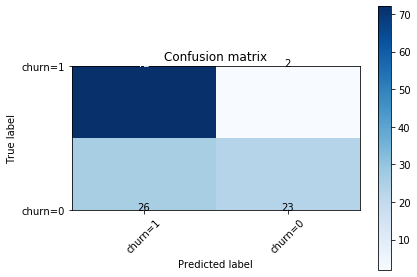

In [60]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y1_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [61]:
print (classification_report(Y1_test, yhat))

              precision    recall  f1-score   support

           0       0.92      0.47      0.62        49
           1       0.73      0.97      0.84        74

    accuracy                           0.77       123
   macro avg       0.83      0.72      0.73       123
weighted avg       0.81      0.77      0.75       123



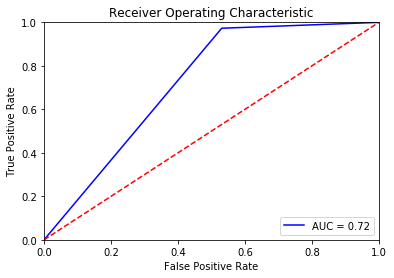

In [64]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = LR.predict(X1_test)
preds = yhat
fpr, tpr, threshold = metrics.roc_curve(Y1_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [65]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Linear regression's Accuracy: ", metrics.accuracy_score(Y1_test, yhat))

Linear regression's Accuracy:  0.7723577235772358
